In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [369]:
df= pd.read_csv('train.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [370]:
df.duplicated().sum()

np.int64(0)

- **To drop duplicates if there are** 

In [371]:
df.drop_duplicates(inplace=True)

# **Uni-Variate Analysis**

### Age Column

In [372]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

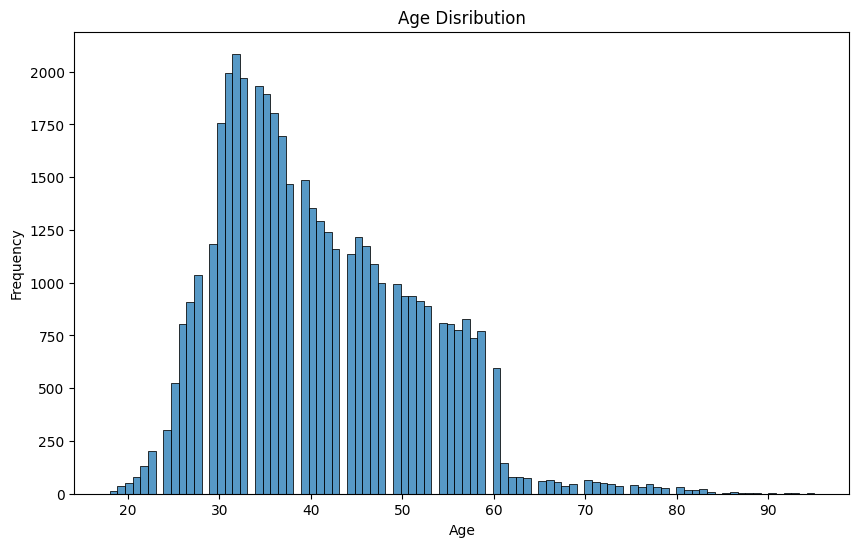

In [373]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'])
plt.title("Age Disribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [374]:
df[df['age']>60]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
199,61,blue-collar,divorced,primary,no,1428,yes,no,unknown,5,may,82,2,-1,0,unknown,no
575,61,retired,married,secondary,no,195,yes,yes,unknown,6,may,179,1,-1,0,unknown,no
1233,61,blue-collar,married,primary,no,734,yes,no,unknown,8,may,204,1,-1,0,unknown,no
2435,61,retired,married,primary,no,1060,yes,no,unknown,13,may,118,1,-1,0,unknown,no
2992,61,retired,married,secondary,no,4248,yes,no,unknown,14,may,71,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45195,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [375]:
df[(df['age']>37)& (df['age']<47)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no
10,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no
16,45,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45155,44,entrepreneur,married,tertiary,no,121,no,no,cellular,9,nov,248,1,91,1,success,yes
45166,41,unemployed,single,tertiary,no,79,no,no,telephone,9,nov,394,1,390,2,success,yes
45175,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
45181,46,blue-collar,married,secondary,no,6879,no,no,cellular,15,nov,74,2,118,3,failure,no


### Job Column

In [376]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

C:\Users\George Hany\AppData\Local\Temp\ipykernel_14840\3074269261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='job', palette='husl')


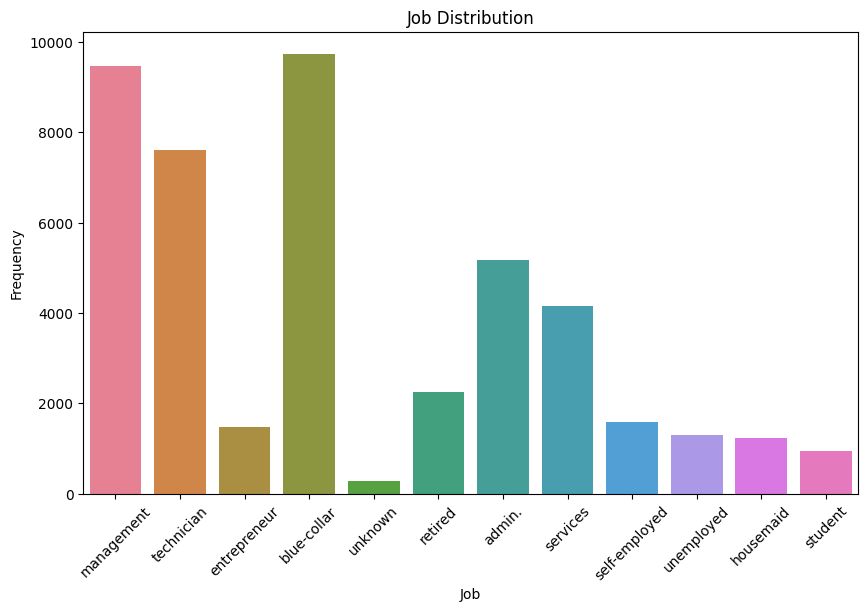

In [377]:
plt.figure(figsize=(10,6))
sns.countplot(df,x='job', palette='husl')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

- **Used xticks(rotation='') to rotate the names a bit**

### Marital Column

In [378]:
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

### Education Column

- **write df. if there is no space words and write df[''] is there is space words**

In [379]:
df.education.value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

### Default Column

In [380]:
df.default.value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

- **if there is no fair arguments and value is much bigger than other we drop whole column**

### Balance Column

In [381]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [382]:
df[df['balance']<0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,199,1,92,14,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,9,1,-1,0,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,110,2,61,9,failure,no


In [383]:
Q1= df['balance'].quantile(0.25)
Q3=df['balance'].quantile(0.75)

IQR=Q3-Q1

upper=Q3 + 1.5*IQR
Lower=Q1 - 1.5*IQR

print(upper)
print(Lower)

3462.0
-1962.0


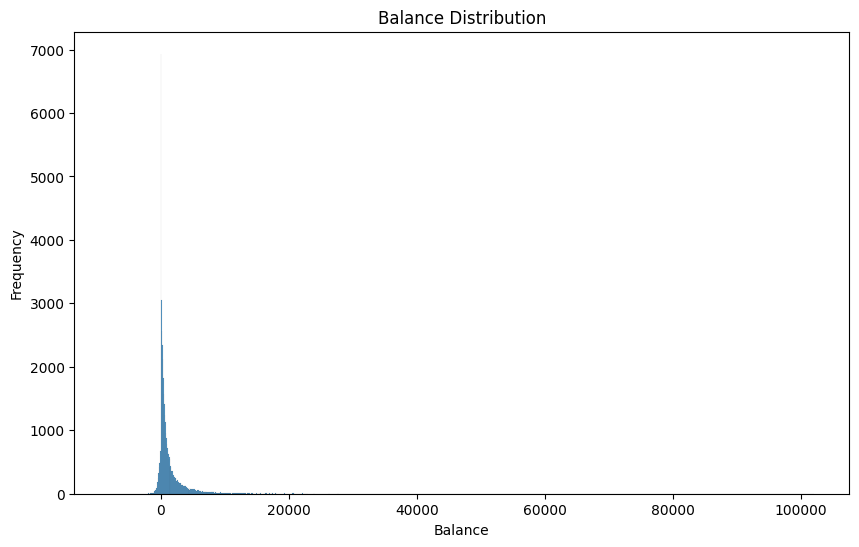

In [384]:
plt.figure(figsize=(10,6))

sns.histplot(df['balance'])
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()



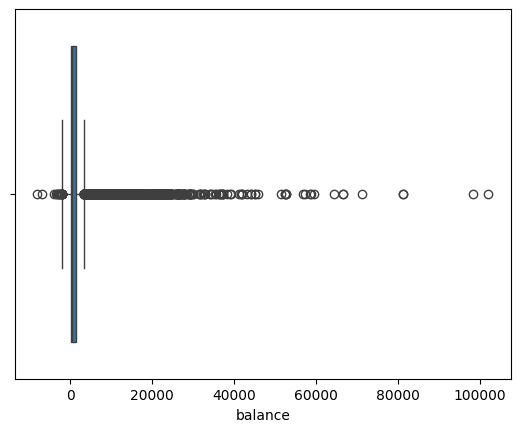

In [385]:
sns.boxplot(data=df,x='balance')
plt.show()

In [386]:
not_outlier_df=df[(df['balance']>Lower)&(df['balance']<upper)]
not_outlier_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


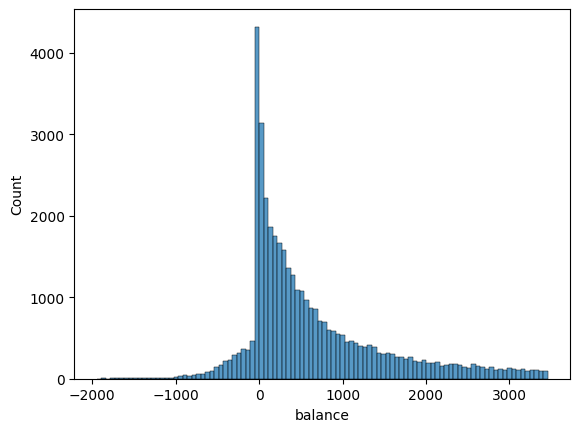

In [387]:
sns.histplot(not_outlier_df['balance'])
plt.show()

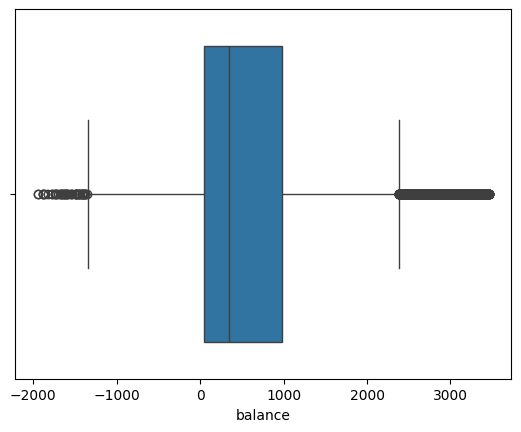

In [388]:
sns.boxplot(data=not_outlier_df, x='balance')
plt.show()

# BiVariate Analysis

In [389]:
df[df['y']=='yes']['age'].value_counts().head(10)

age
32    221
30    217
33    210
35    209
31    206
34    198
36    195
29    171
37    170
28    162
Name: count, dtype: int64

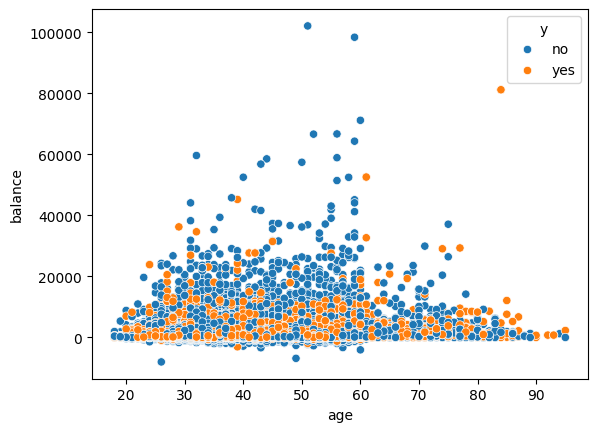

In [390]:
sns.scatterplot(data=df,x='age',y='balance',hue='y')
plt.show()

In [391]:
df.groupby(['job'])['balance'].mean().sort_values(ascending=False)

job
retired          1984.215106
unknown          1772.357639
management       1763.616832
self-employed    1647.970868
unemployed       1521.745971
entrepreneur     1521.470074
housemaid        1392.395161
student          1388.060768
technician       1252.632092
admin.           1135.838909
blue-collar      1078.826654
services          997.088108
Name: balance, dtype: float64

In [392]:
df.groupby(['marital'])['y'].value_counts()

marital   y  
divorced  no      4585
          yes      622
married   no     24459
          yes     2755
single    no     10878
          yes     1912
Name: count, dtype: int64

In [393]:
married_df=df[df['marital']=='married']
married_df.groupby(['marital'])['balance'].mean()

marital
married    1425.92559
Name: balance, dtype: float64

In [394]:
neg_bal=df[df['balance']<0]
neg_bal.groupby(['marital'])['balance'].mean()

marital
divorced   -306.619792
married    -341.308356
single     -271.457490
Name: balance, dtype: float64

In [395]:
df.groupby(['default','housing'])['loan'].value_counts()

default  housing  loan
no       no       no      16992
                  yes      2709
         yes      no      20461
                  yes      4234
yes      no       no        212
                  yes       168
         yes      no        302
                  yes       133
Name: count, dtype: int64

In [396]:
df.groupby(['default'])['balance'].mean()

default
no     1389.806424
yes    -137.624540
Name: balance, dtype: float64

In [397]:
df.groupby(['housing','loan'])['balance'].mean()

housing  loan
no       no      1737.606719
         yes      752.713243
yes      no      1256.407793
         yes      788.537898
Name: balance, dtype: float64

In [398]:
df.groupby(['default'])['y'].value_counts()

default  y  
no       no     39159
         yes     5237
yes      no       763
         yes       52
Name: count, dtype: int64

In [399]:
df[(df['default']=='yes')& (df['y']=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1767,32,blue-collar,married,secondary,yes,-1,yes,no,unknown,9,may,653,1,-1,0,unknown,yes
2387,24,services,single,secondary,yes,-122,yes,no,unknown,13,may,1000,1,-1,0,unknown,yes
4897,30,blue-collar,single,secondary,yes,239,yes,no,unknown,21,may,412,1,-1,0,unknown,yes
7637,48,technician,married,secondary,yes,0,no,no,unknown,30,may,682,1,-1,0,unknown,yes
8218,42,technician,single,secondary,yes,-1129,yes,no,unknown,2,jun,555,5,-1,0,unknown,yes
8345,44,management,divorced,tertiary,yes,-411,yes,no,unknown,2,jun,432,4,-1,0,unknown,yes
8442,40,self-employed,married,secondary,yes,-754,yes,yes,unknown,3,jun,941,3,-1,0,unknown,yes
8570,26,blue-collar,single,secondary,yes,-36,yes,no,unknown,3,jun,482,2,-1,0,unknown,yes
8817,27,management,single,tertiary,yes,-713,yes,no,unknown,4,jun,525,2,-1,0,unknown,yes
9144,56,housemaid,divorced,primary,yes,1238,no,no,unknown,5,jun,1558,1,-1,0,unknown,yes


In [400]:
df[df['campaign']>50]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4299,30,management,single,tertiary,no,358,yes,no,unknown,19,may,88,51,-1,0,unknown,no
4330,45,management,married,unknown,no,9051,yes,no,unknown,19,may,124,63,-1,0,unknown,no
5073,35,technician,married,secondary,no,432,yes,no,unknown,21,may,1094,55,-1,0,unknown,no
11914,24,technician,single,primary,no,126,yes,no,unknown,20,jun,10,58,-1,0,unknown,no


In [401]:
df.groupby(['y'])['duration'].mean()

y
no     221.182806
yes    537.294574
Name: duration, dtype: float64

In [402]:
df.groupby(['y'])['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,221.182806,207.383237,0.0,95.0,164.0,279.0,4918.0
yes,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


In [403]:
df.groupby(['default'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
no,44396.0,40.961934,10.638882,18.0,33.0,39.0,48.0,95.0
yes,815.0,39.534969,9.357804,21.0,32.0,38.0,47.0,71.0


In [404]:
df[df['default']=='yes'].groupby(['default'])['age'].mean()

default
yes    39.534969
Name: age, dtype: float64

In [405]:
df['y'].value_counts(normalize=True)*100

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

In [406]:
df['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [407]:
df.groupby(['y'])['month'].value_counts()

y    month
no   may      12841
     jul       6268
     aug       5559
     jun       4795
     nov       3567
     apr       2355
     feb       2208
     jan       1261
     oct        415
     sep        310
     mar        229
     dec        114
yes  may        925
     aug        688
     jul        627
     apr        577
     jun        546
     feb        441
     nov        403
     oct        323
     sep        269
     mar        248
     jan        142
     dec        100
Name: count, dtype: int64

In [408]:
df.value_counts()

age  job      marital  education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  y  
95   retired  married  secondary  no       0        no       no    telephone  1    oct    215       1         -1     0         unknown   no     1
18   student  single   primary    no       608      no       no    cellular   12   aug    267       1         -1     0         unknown   yes    1
                                                                              13   nov    210       1          93    1         success   yes    1
                                           1944     no       no    telephone  10   aug    122       3         -1     0         unknown   no     1
                       secondary  no       5        no       no    cellular   24   aug    143       2         -1     0         unknown   no     1
                                                                                                                                 

- **Drop unlogical Columns**

In [409]:
df.drop(columns=['default','contact','pdays','poutcome'],inplace=True)

# Machine Learning

## Preprocessing 

In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  y          45211 non-null  object
dtypes: int64(6), object(7)
memory usage: 4.5+ MB


In [411]:
encoder= LabelEncoder()
df['job']=encoder.fit_transform(df['job'])
df['marital']=encoder.fit_transform(df['marital'])
df['education']=encoder.fit_transform(df['education'])
df['housing']=encoder.fit_transform(df['housing'])
df['loan']=encoder.fit_transform(df['loan'])
df['month']=encoder.fit_transform(df['job'])
df['y']=encoder.fit_transform(df['y'])



In [412]:
X=df.iloc[:,:-1]
X

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,previous
0,58,4,1,2,2143,1,0,5,4,261,1,0
1,44,9,2,1,29,1,0,5,9,151,1,0
2,33,2,1,1,2,1,1,5,2,76,1,0
3,47,1,1,3,1506,1,0,5,1,92,1,0
4,33,11,2,3,1,0,0,5,11,198,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,825,0,0,17,9,977,3,0
45207,71,5,0,0,1729,0,0,17,5,456,2,0
45208,72,5,1,1,5715,0,0,17,5,1127,5,3
45209,57,1,1,1,668,0,0,17,1,508,4,0


In [413]:
y=df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [414]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

### Logistic Regression

In [435]:
model5=LogisticRegression(max_iter=12000)
model5.fit(X_train,y_train)

LogisticRegression(max_iter=12000)

In [436]:
y_pred=model5.predict(X_test)

In [437]:
rate=accuracy_score(y_test,y_pred)*100
print(f'{int(rate)}%')

88%


In [438]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.56      0.19      0.29      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.59      0.61      9043
weighted avg       0.86      0.88      0.86      9043



In [439]:
print(confusion_matrix(y_test,y_pred))

[[7787  165]
 [ 880  211]]
